In [32]:
%config IPCompleter.greedy=True
from queue import *

In [70]:
#g = graphs.CycleGraph(4)
g = Graph(8) #Graph({0: [1], 1: [2,3], 3: [4,5]})
g.add_edge(0,1)
g.add_edge(0,2)
g.add_edge(1,2)
g.add_edge(2,3)
g.add_edge(1,3)
g.add_edge(3,6)
g.add_edge(3,4)
g.add_edge(3,5)
g.add_edge(3,7)
g.add_edge(4,5)
g.add_edge(5,7)
g.add_edge(4,6)
g.add_edge(5,6)
g.add_edge(7,6)

# pos = {0:[0.0, 1.5], 1:[-0.8, 0.3], 2:[-0.6, -0.8]




In [71]:
m = Matroid(g)
#m.basis
#iterator = m.bases()
#for i in iterator:
    #print(i)

In [72]:
class IndependentSet():
    def __init__(self, g):
        self.G = Graph(g.order())

    def I(self):
        return self.G.edges()

In [73]:
# https://medium.com/100-days-of-algorithms/day-41-union-find-d0027148376d
def find(data, i):
    if i != data[i]:
        data[i] = find(data, data[i])
    return data[i]

def union(data, i, j):
    pi, pj = find(data, i), find(data, j)
    if pi != pj:
        data[pi] = pj

In [74]:
def rootTree(self, root, treenumber, I):
    d = DiGraph()
    q = Queue()
    q.put(root)
    levelordernumber = 0
    
    while not q.empty():
        v = q.get()
        levelordernumber += 1
        I.Levelordernumbers[v] = levelordernumber
        I.Visited[v] = True
        I.Treenumbers[v] = treenumber
        
        for n in self.neighbor_iterator(v):
            if not I.Visited[n]:
                d.add_edge(v,n)
                q.put(n)
                
    return d
        
Graph.rootTree = rootTree

In [75]:
def c((a,b,_), I):
    if I.Treenumbers[a] != I.Treenumbers[b]:
        return None
    
    cycle = []
    tree = I.Trees[I.Treenumbers[a]]
    while a != b:
        if I.Levelordernumbers[a] > I.Levelordernumbers[b]:
            parent = tree.neighbors_in(a)[0]
            if find(I.Disjointsets, parent) != find(I.Disjointsets, a):
                cycle.append((parent, a, None))
                union(I.Disjointsets, parent, a)
            a = parent
        else:
            parent = tree.neighbors_in(b)[0]
            if find(I.Disjointsets, parent) != find(I.Disjointsets, b):
                cycle.append((parent, b, None))
                union(I.Disjointsets, parent, b)
            b = parent
    
    #show(tree)
    return cycle

In [76]:
def start(Is):
    for I in Is:
        I.Treenumbers = [0] * g.order()
        I.Trees = list()
        I.Levelordernumbers = [0] * g.order()
        I.Visited = [False] * g.order()
        I.Disjointsets = [i for i in range(I.G.order())]
        components = I.G.connected_components_subgraphs()
        for idx, c in enumerate(components):
            rootedTree = c.rootTree(c.vertices()[0], idx, I)
            I.Trees.append(rootedTree)

In [77]:
def cyclic_scanning(e, k, labels, Is):
    q = Queue()
    q.put(e)
    while not q.empty():
        e = q.get()
        (_,i) = labels[e]
        i = (i + 1) % k
        cycle = c(e, Is[i])
        if cycle == None:
            return ((e,i), labels)
        for f in cycle:
            labels[f] = (e, i)
            q.put(f)
    return (None, labels)

In [78]:
def k_forest(g, k):
    Is = [IndependentSet(g) for i in range(k)]
    start(Is)
    label = None
    for e in g.edges():
        labels = {}
        labels[e] = (e,-1)
        if label != None:
            start(Is)
        (label, labels) = cyclic_scanning(e, k, labels, Is)
        if label != None:
            (f,i) = label
            while i != -1:
                Is[i].G.add_edge(f[:2] + (i,))
                if f != e:
                    i = (i - 1) % k
                    Is[i].G.delete_edge(f[:2] + (i,))
                (f,i) = labels[f]
    return Is

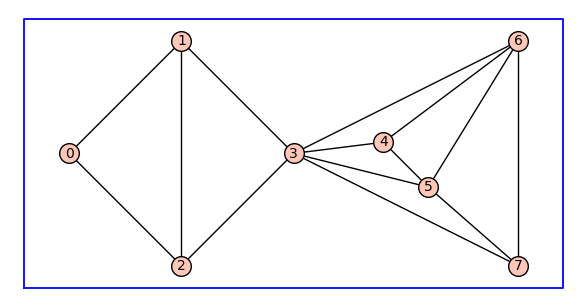

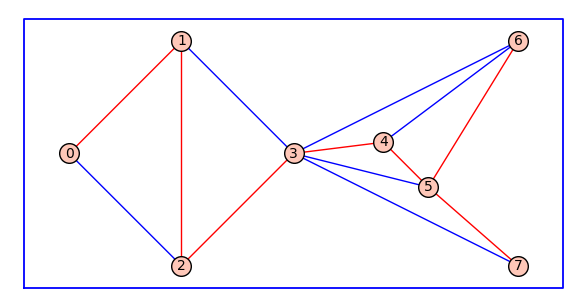

In [80]:
pos = {0:[0.0, 0.0], 1:[1.0, 1.0], 2:[1.0, -1.0], 3:[2.0, 0.0], 
       4:[2.8, 0.1], 5:[3.2, -0.3], 6:[4.0, 1.0], 7:[4.0, -1.0]}

p = g.plot(vertex_labels=True, graph_border=True, pos=pos)
p.show()

Is = k_forest(g, 2)
l1 = Is[0].I()
l2 = Is[1].I()
l = l1 + l2
output = Graph({})
output.add_edges(l)
p = output.plot(vertex_labels=True, graph_border=True, 
           color_by_label={0:(1,0,0), 1:(0,0,1)}, pos=pos)
p.show()
#print(l)
